# 1A.algo - quicksort - correction

Implémentation du quicksort façon graphe.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

## Q1 : classe

In [3]:
class NoeudTri (object):
    def __init__(self,s):
        self.mot = s
        
NoeudTri("a")

## Q2 : str, repr

In [5]:
class NoeudTri (object):
    def __init__(self,s):
        self.mot = s
    def __str__(self): 
        return self.mot + "\n"  # \n : passage à la ligne
    
print(NoeudTri("a"))

a



In [6]:
class NoeudTri (object):
    def __init__(self,s):
        self.mot = s
    def __str__(self): 
        return self.mot + "\n"  # \n : passage à la ligne
    def __repr__(self): 
        return "NoeudTri('{0}')".format(self.mot)
    
NoeudTri("a")

NoeudTri('a')

## Q3 : avant, après

In [8]:
class NoeudTri (object):
    def __init__(self,s): 
        self.mot = s
    def __str__(self): 
        return self.mot + "\n"
    def __repr__(self): 
        return "NoeudTri('{0}')".format(self.mot)
    def insere(self,s):
        if s < self.mot:
            self.avant = NoeudTri (s)  # ajout d'un successeur
        elif s > self.mot:
            self.apres = NoeudTri (s)  # ajout d'un successeur
        else:
            # égalite, on ne fait rien
            pass
            
n = NoeudTri("a")
n.insere("b")

La méthode ``insere`` prévoit de ne rien faire dans le cas où le mot ``s`` passé en argument est égal à l'attribut ``mot`` : cela revient à ignorer les doublons dans la liste de mots à trier.

## Q4 : __str__

In [9]:
class NoeudTri (object):
    def __init__(self,s):
        self.mot = s
        
    def __str__(self):
        s = ""
        if hasattr(self, "avant"):
            s += self.avant.__str__ ()
        s += self.mot + "\n"
        if hasattr(self, "apres"):
            s += self.apres.__str__()
        return s
    def __repr__(self): 
        return "NoeudTri('{0}')".format(self.mot)
    def insere(self,s):
        if s < self.mot:
            self.avant = NoeudTri (s)  # ajout d'un successeur
        elif s > self.mot:
            self.apres = NoeudTri (s)  # ajout d'un successeur
        else:
            # égalite, on ne fait rien
            pass

n = NoeudTri("a")
n.insere("b")
print(n)

a
b



L'insertion des mots donnés dans l'énoncé produit le code suivant :

## Q5, Q6

Il reste à compléter la fonction ``insere`` afin qu'elle puisse trouver le bon noeud où insérer un nouveau mot. Cette méthode est récursive : si un noeud contient deux attributs ``avant`` et ``apres``, cela signifie que le nouveau mot doit être inséré plus bas, dans des noeuds reliés soit à ``avant`` soit à ``apres``. La méthode ``insere`` choisit donc un des attributs et délègue le problème à la méthode ``insere`` de ce noeud.

In [10]:
class SecondeInserstion (AttributeError):
    "insertion d'un mot déjà inséré"

class NoeudTri :
    
    def __init__(self,s):
        self.mot = s
        
    # la création d'un nouveau noeud a été placée dans une méthode
    def nouveau_noeud(self, s) : 
        return self.__class__(s)
        
    def __str__(self):
        s = ""
        if hasattr(self, "avant"):
            s += self.avant.__str__ ()
        s += self.mot + "\n"
        if hasattr(self, "apres"):
            s += self.apres.__str__()
        return s
    def __repr__(self): 
        return "NoeudTri('{0}')".format(self.mot)
    
    def insere(self,s):
        if s < self.mot:
            if hasattr(self, "avant"): 
                self.avant.insere (s)  # délégation
            else:
                self.avant = self.nouveau_noeud(s)  # création
        elif s > self.mot:
            if hasattr(self, "apres"):
                self.apres.insere (s) # délégation
            else:
                self.apres = self.nouveau_noeud(s)  # création
        else:
            raise SecondeInsertion(s)
        
li = ["un", "deux", "unite", "dizaine", "exception", "dire", \
      "programme", "abc", "xyz", "opera", "quel"]
     
racine = None
for mot in li:
    if racine is None: 
        # premier cas : aucun mot --> on crée le premier noeud
        racine = NoeudTri(mot)
    else : 
        # second cas : il y a déjà un mot, on ajoute le mot suivant à l'arbre
        racine.insere(mot)

print(racine)

abc
deux
dire
dizaine
exception
opera
programme
quel
un
unite
xyz



## Q7 : dessin

In [11]:
class NoeudTri :
    
    def __init__(self,s):
        self.mot = s
        
    # la création d'un nouveau noeud a été placée dans une méthode
    def nouveau_noeud(self, s) : 
        return self.__class__(s)
        
    def __str__(self):
        s = ""
        if hasattr(self, "avant"):
            s += self.avant.__str__ ()
        s += self.mot + "\n"
        if hasattr(self, "apres"):
            s += self.apres.__str__()
        return s
    def __repr__(self): 
        return "NoeudTri('{0}')".format(self.mot)
    
    def insere(self,s):
        if s < self.mot:
            if hasattr(self, "avant"): 
                self.avant.insere (s)  # délégation
            else:
                self.avant = self.nouveau_noeud(s)  # création
        elif s > self.mot:
            if hasattr(self, "apres"):
                self.apres.insere (s) # délégation
            else:
                self.apres = self.nouveau_noeud(s)  # création
        else:
            raise SecondeInsertion(s)
        
    def dessin(self):
        s = ""
        if hasattr(self, "avant"):
            s += 'n{0} -> n{1} [label="-"];\n'.format(id(self), id(self.avant))
            s += self.avant.dessin()
        s += 'n{0} [label="{1}"];\n'.format(id(self), self.mot)
        if hasattr(self, "apres"):
            s += 'n{0} -> n{1} [label="+"];\n'.format(id(self), id(self.apres))
            s += self.apres.dessin()
        return s    
    
li = ["un", "deux", "unite", "dizaine", "exception", "dire", \
      "programme", "abc", "xyz", "opera", "quel"]
     
racine = None
for mot in li:
    if racine is None: 
        # premier cas : aucun mot --> on crée le premier noeud
        racine = NoeudTri(mot)
    else : 
        # second cas : il y a déjà un mot, on ajoute le mot suivant à l'arbre
        racine.insere(mot)

print(racine.dessin())

n3012711442136 -> n3012711442528 [label="-"];
n3012711442528 -> n3012711442416 [label="-"];
n3012711442416 [label="abc"];
n3012711442528 [label="deux"];
n3012711442528 -> n3012711442472 [label="+"];
n3012711442472 -> n3012711442360 [label="-"];
n3012711442360 [label="dire"];
n3012711442472 [label="dizaine"];
n3012711442472 -> n3012711442192 [label="+"];
n3012711442192 [label="exception"];
n3012711442192 -> n3012711442304 [label="+"];
n3012711442304 -> n3012712180984 [label="-"];
n3012712180984 [label="opera"];
n3012711442304 [label="programme"];
n3012711442304 -> n3012712181040 [label="+"];
n3012712181040 [label="quel"];
n3012711442136 [label="un"];
n3012711442136 -> n3012711442024 [label="+"];
n3012711442024 [label="unite"];
n3012711442024 -> n3012711442584 [label="+"];
n3012711442584 [label="xyz"];



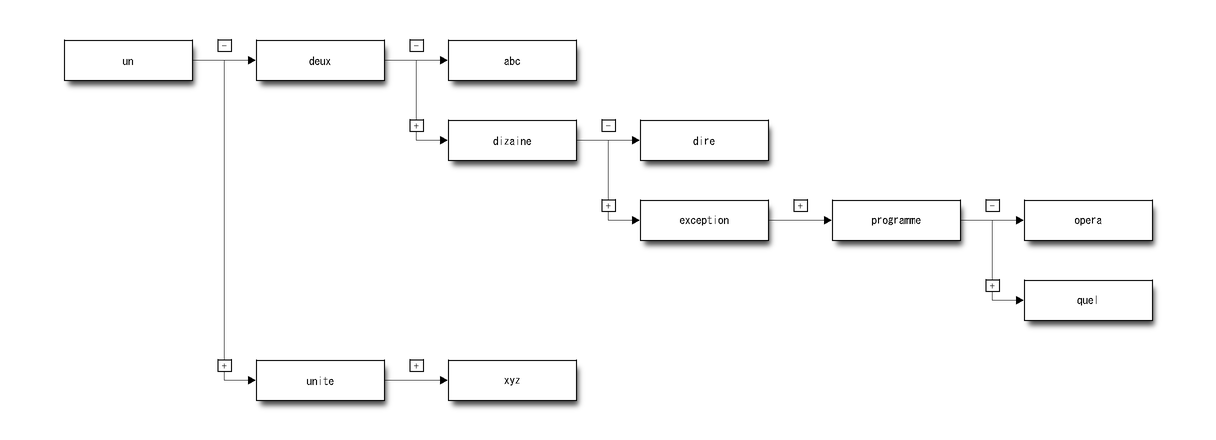

In [12]:
from pyensae.graph_helper import draw_diagram
img = draw_diagram("""
blockdiag {{
{0}
}}
""".format(racine.dessin()))
img